# **Neural Networks**
part 5: regularization

### **Changes**
- L1 and L2 regularization
- early stopping
- new functions for visualization

### **Imports**


In [1]:
import pandas as pd

from network.mlp import MLP
from network.activations import Identity, Sigmoid, Tanh, ReLU, Softmax, LeakyReLU
from network.losses import LossCrossEntropy, LossMSE
    

from visualization.analysis import run_regularization_classification, run_regularization_regression

In [8]:
multimodal_sparse_train = pd.read_csv('./data/regression/multimodal-sparse-training.csv')
multimodal_sparse_test = pd.read_csv('./data/regression/multimodal-sparse-test.csv')

rings3_balance_train = pd.read_csv('./data/classification/rings3-balance-training.csv')
rings3_balance_test = pd.read_csv('./data/classification/rings3-balance-test.csv')

rings5_sparse_train = pd.read_csv('./data/classification/rings5-sparse-training.csv')
rings5_sparse_test = pd.read_csv('./data/classification/rings5-sparse-test.csv')

xor3_balance_train = pd.read_csv('./data/classification/xor3-balance-training.csv')
xor3_balance_test = pd.read_csv('./data/classification/xor3-balance-test.csv')

### **Regression**
### **Dataset: Multimodal Sparse**

Visualizing train and test datasets...


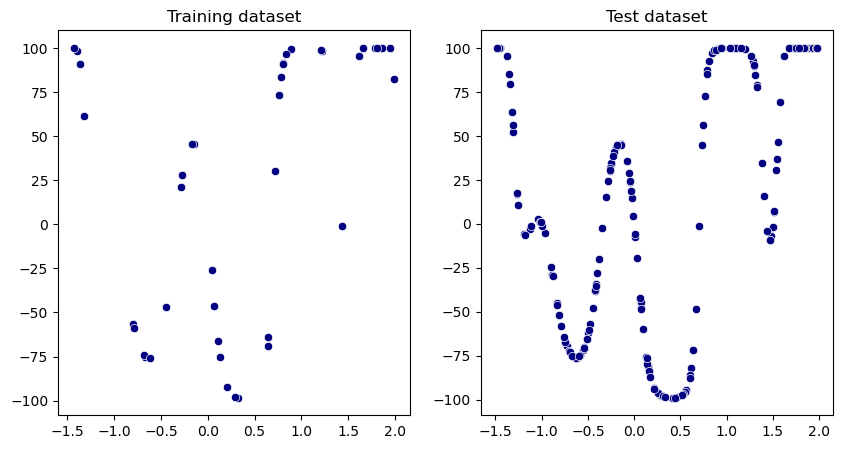

Training without regularization
Early stopping at epoch 2374 with loss 10.9911 and validation loss 5.1556.
Training with L1 regularization
Early stopping at epoch 2839 with loss 10.4807 and validation loss 6.6636.
Early stopping at epoch 3053 with loss 15.4936 and validation loss 4.2882.
Early stopping at epoch 1414 with loss 166.2700 and validation loss 38.0549.
Early stopping at epoch 1388 with loss 218.8337 and validation loss 40.1459.
Early stopping at epoch 2542 with loss 15.6857 and validation loss 12.4981.
Early stopping at epoch 3199 with loss 102.7576 and validation loss 102.8567.
Early stopping at epoch 2764 with loss 999.3700 and validation loss 1004.0916.
Training with L2 regularization
Early stopping at epoch 1470 with loss 215.6819 and validation loss 40.5593.
Early stopping at epoch 2629 with loss 10.8460 and validation loss 5.7315.
Early stopping at epoch 2700 with loss 9.6589 and validation loss 4.1054.
Early stopping at epoch 2591 with loss 11.1556 and validation loss

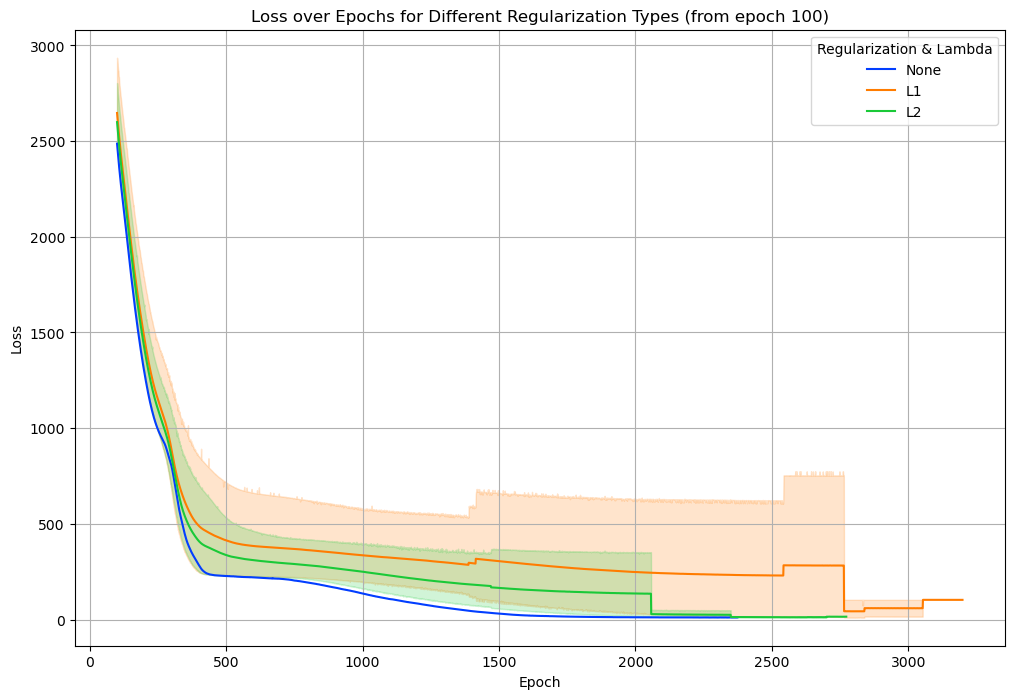

Visualizing loss on test dataset in respect to lambda for different regularization types...


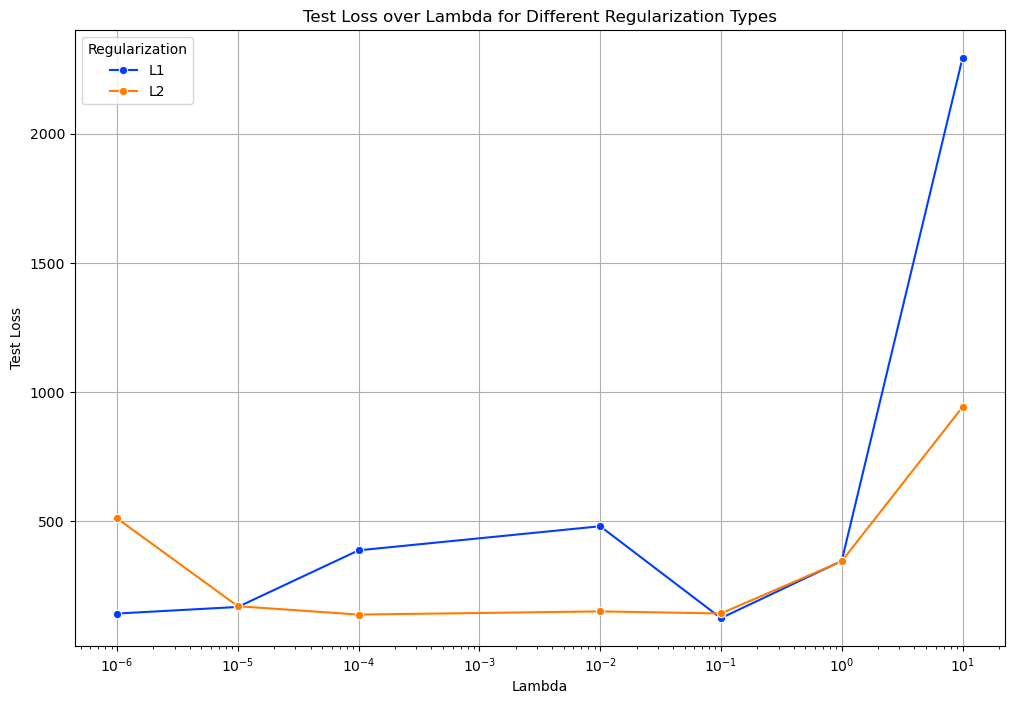

Visualizing average predictions for different regularization types...


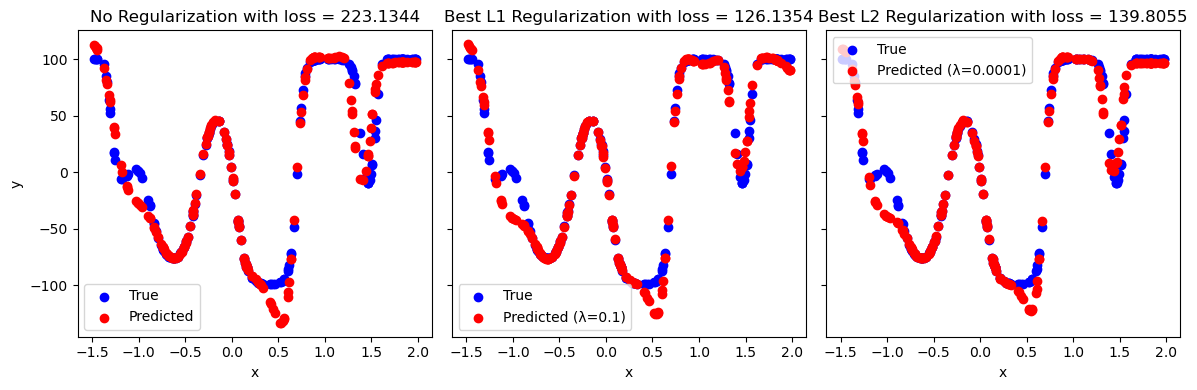

In [3]:
run_regularization_regression(train_df = multimodal_sparse_train,
                   test_df = multimodal_sparse_test,
                        layers_init = [
                            {"output_size": 100, "activation": Tanh(), "init": "uniform"},
                            {"output_size": 1, "activation": Identity(), "init": "uniform"}
                        ],
                        loss_function = LossMSE(),
                        lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                        method="momentum",
                        learning_rate=0.1,
                        epochs=5000,
                        clip_value=1,     
                        patience=1000,
                        delta=3,
                        random_state=42
                   )

#### **Conclusions**
- the test dataset contains significantly more data points than train, therefore there is high chance that the results will be far from ideal (last plot proves it)
- generally, lower lambdas (regularization parameters provide better results)
- here, the best converging method is the one without resularization
- early stopping works as it should

### **Task: classification**
### **Dataset: Rings 3 Balance**

Visualizing train and test datasets...


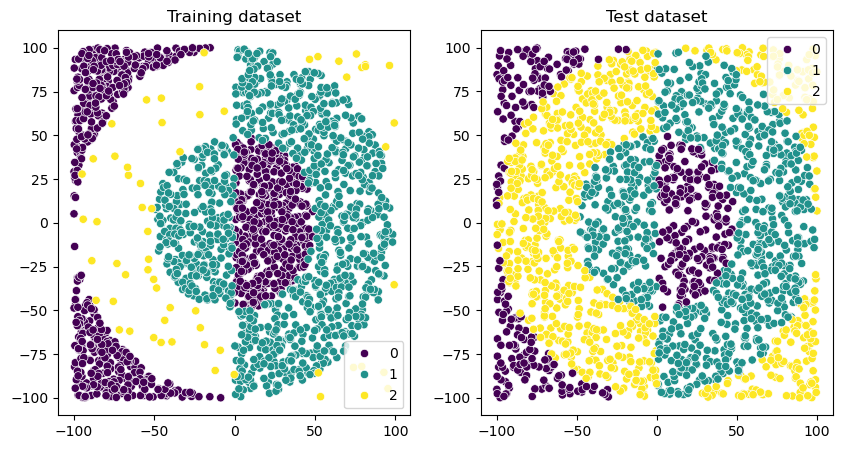

Training without regularization...
Early stopping at epoch 1007 with loss 2.8699 and validation loss 2.0521.
Training with L1 regularization...
Early stopping at epoch 1007 with loss 2.8700 and validation loss 2.0521.
Early stopping at epoch 1007 with loss 2.8702 and validation loss 2.0523.
Early stopping at epoch 1007 with loss 2.8724 and validation loss 2.0545.
Early stopping at epoch 1007 with loss 3.1170 and validation loss 2.2986.
Early stopping at epoch 1007 with loss 5.3402 and validation loss 4.5172.
Early stopping at epoch 1007 with loss 27.5744 and validation loss 26.7152.
Early stopping at epoch 1007 with loss 249.4788 and validation loss 248.5681.
Training with L2 regularization...
Early stopping at epoch 1007 with loss 2.8700 and validation loss 2.0521.
Early stopping at epoch 1007 with loss 2.8702 and validation loss 2.0523.
Early stopping at epoch 1007 with loss 2.8721 and validation loss 2.0542.
Early stopping at epoch 1007 with loss 3.0914 and validation loss 2.2732.
E

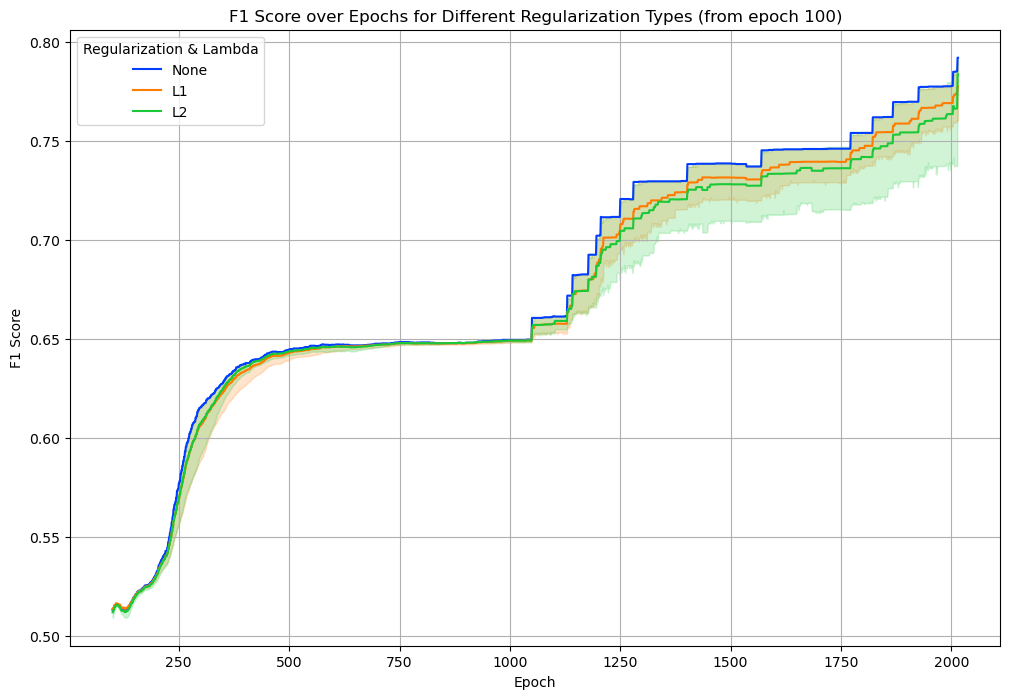

Visualizing F1 score over lambda for different regularization types...


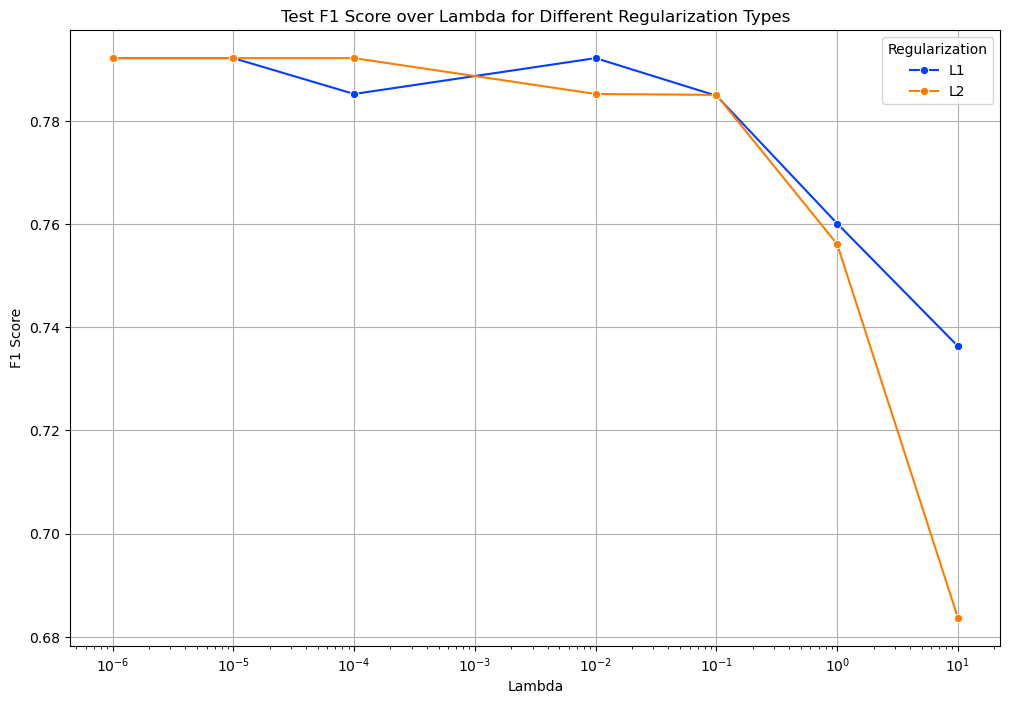

Visualizing best class predictions...


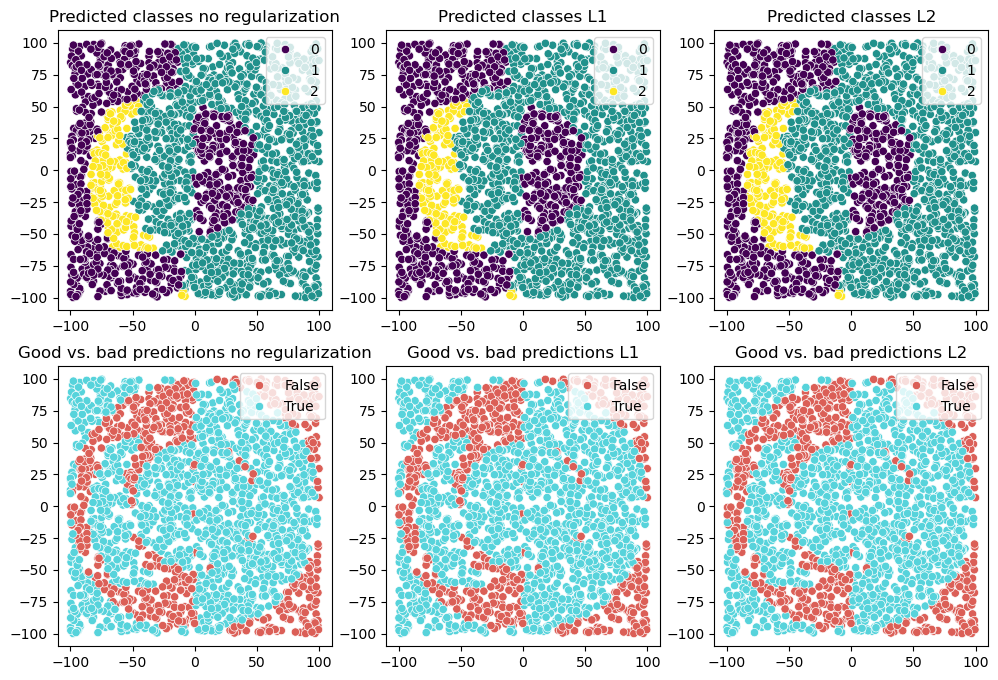

Best F1 scores:
No regularization: 0.6392
L1 regularization (lambda=1e-06): 0.6392
L2 regularization (lambda=1e-06): 0.6392


In [5]:
rings3_res = run_regularization_classification(train_df =rings3_balance_train,
                                  test_df=rings3_balance_test,
                                  layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 3, "activation": Softmax(), "init": "xavier_normal"}],
                                  loss_function=LossCrossEntropy(),
                                  lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                                  epochs=5000,
                                  method="momentum",
                                  learning_rate=0.05,
                                  batch_size=None,
                                  clip_value=None,
                                  patience=1000,
                                  delta=10)

#### **Conclusions**
- the test dataset contains significantly more data points for class 2 than train, therefore there is high chance that the results will be far from ideal (last plot proves it)
- generally, lower the lambdas (regularization parameters) provide better results
- here, the best converging method is the one without resularization
- early stopping works as it should

### **Dataset: Rings 5 Sparse**

Visualizing train and test datasets...


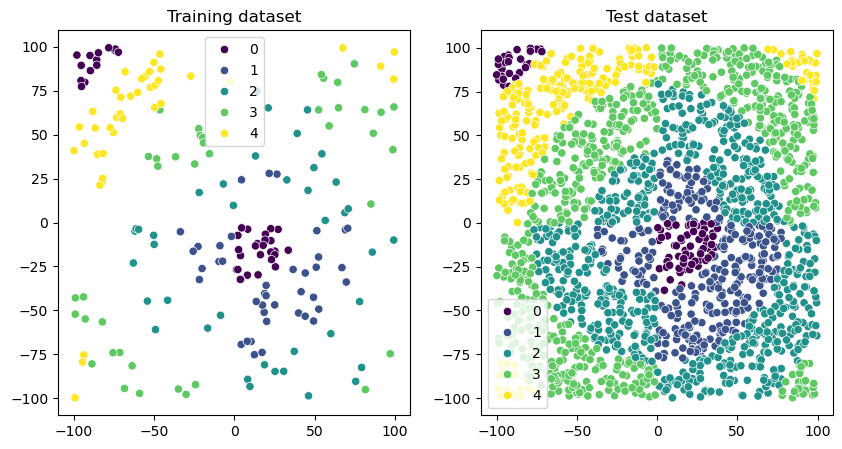

Training without regularization...
Early stopping at epoch 1077 with loss 1.3573 and validation loss 0.5857.
Training with L1 regularization...
Early stopping at epoch 1077 with loss 1.3578 and validation loss 0.5851.
Early stopping at epoch 1077 with loss 1.3582 and validation loss 0.5809.
Early stopping at epoch 1077 with loss 1.3662 and validation loss 0.5976.
Early stopping at epoch 1077 with loss 2.0358 and validation loss 1.2374.
Early stopping at epoch 1077 with loss 7.8885 and validation loss 7.0481.
Early stopping at epoch 1078 with loss 65.6555 and validation loss 64.3669.
Early stopping at epoch 1001 with loss 646.0059 and validation loss 652.6853.
Training with L2 regularization...
Early stopping at epoch 1077 with loss 1.3577 and validation loss 0.5841.
Early stopping at epoch 1077 with loss 1.3585 and validation loss 0.5898.
Early stopping at epoch 1077 with loss 1.3632 and validation loss 0.5987.
Early stopping at epoch 1076 with loss 1.8094 and validation loss 1.0212.
E

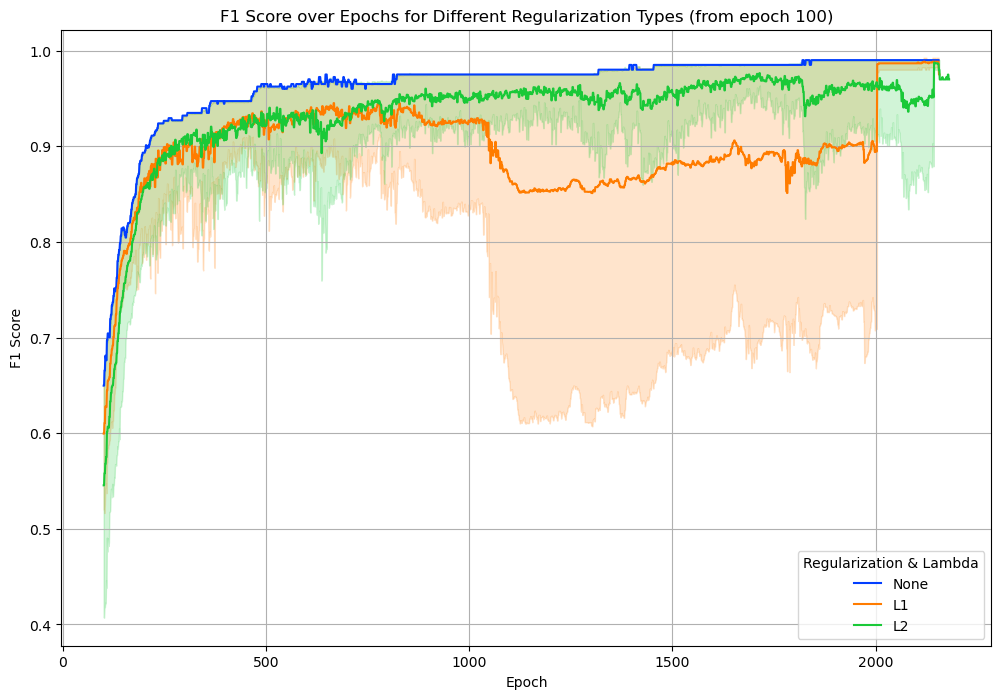

Visualizing F1 score over lambda for different regularization types...


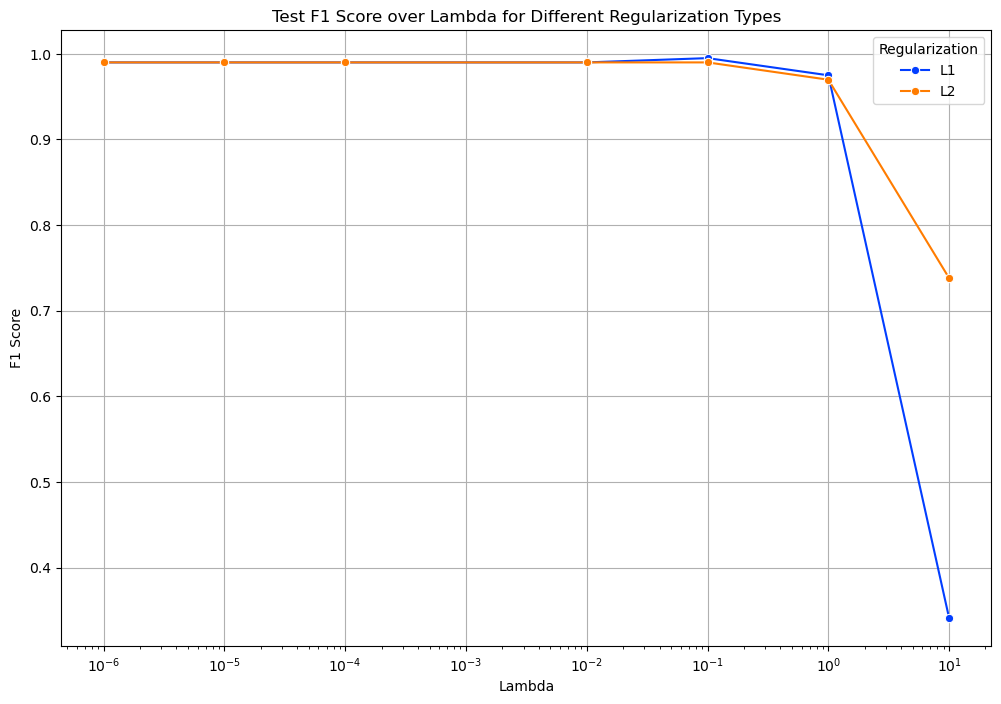

Visualizing best class predictions...


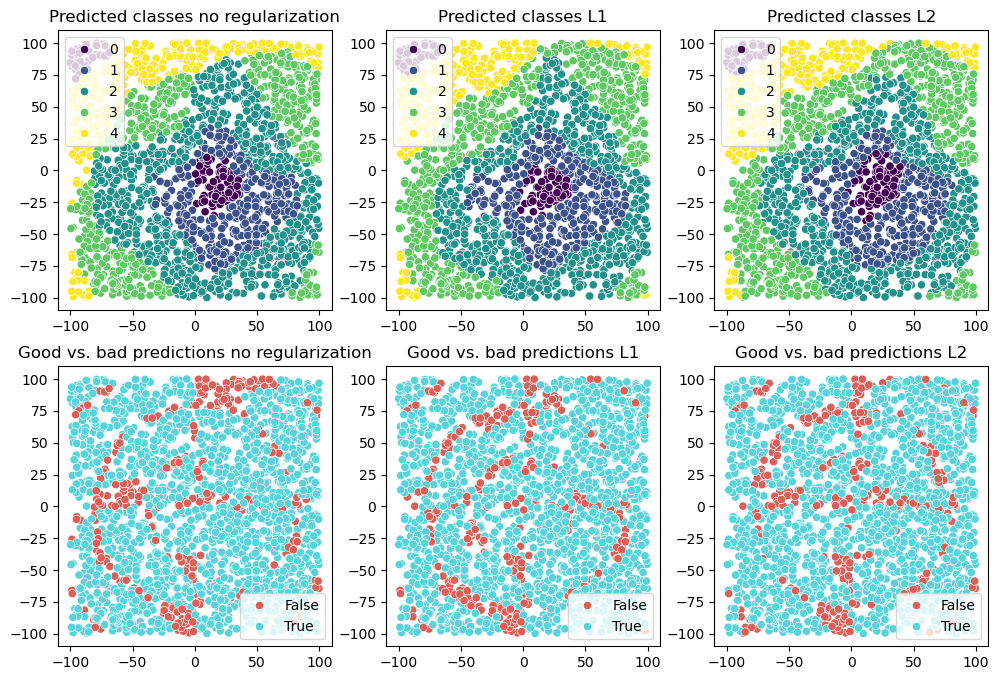

Best F1 scores:
No regularization: 0.8423
L1 regularization (lambda=1): 0.8441
L2 regularization (lambda=1): 0.8427


In [ ]:
rings3_res = run_regularization_classification(train_df =rings5_sparse_train,
                                  test_df=rings5_sparse_test,
                                  layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 5, "activation": Softmax(), "init": "xavier_normal"}],
                                  loss_function=LossCrossEntropy(),
                                  lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                                  epochs=5000,
                                  method="momentum",
                                  learning_rate=0.05,
                                  batch_size=None,
                                  clip_value=None,
                                  patience=1000,
                                  delta=10)

#### **Conclusions**
- the test dataset contains significantly more data points for all class than train, therefore there is high chance that the results will be far from ideal (last plot proves it)
- generally, lower lambdas (regularization parameters) provide better results
- there is no best method
- early stopping works as it should

Visualizing train and test datasets...


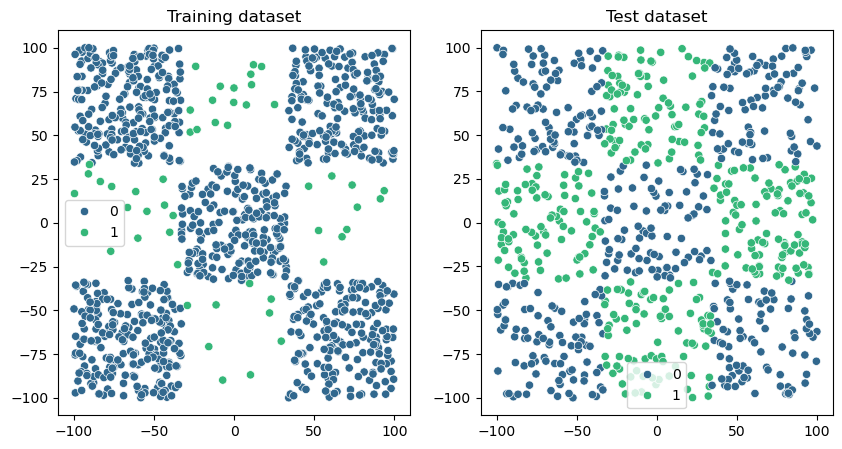

Training without regularization...
Early stopping at epoch 1001 with loss 0.9090 and validation loss 0.4251.
Training with L1 regularization...
Early stopping at epoch 1001 with loss 0.9103 and validation loss 0.4270.
Early stopping at epoch 1001 with loss 0.9095 and validation loss 0.4254.
Early stopping at epoch 1001 with loss 0.9127 and validation loss 0.4282.
Early stopping at epoch 1001 with loss 1.4633 and validation loss 0.9805.
Early stopping at epoch 1001 with loss 6.3968 and validation loss 5.9145.
Early stopping at epoch 1001 with loss 55.9027 and validation loss 55.1955.
Early stopping at epoch 1001 with loss 546.0129 and validation loss 545.7468.
Training with L2 regularization...
Early stopping at epoch 1001 with loss 0.9086 and validation loss 0.4244.
Early stopping at epoch 1001 with loss 0.9101 and validation loss 0.4270.
Early stopping at epoch 1001 with loss 0.9159 and validation loss 0.4331.
Early stopping at epoch 1001 with loss 1.3109 and validation loss 0.8289.
E

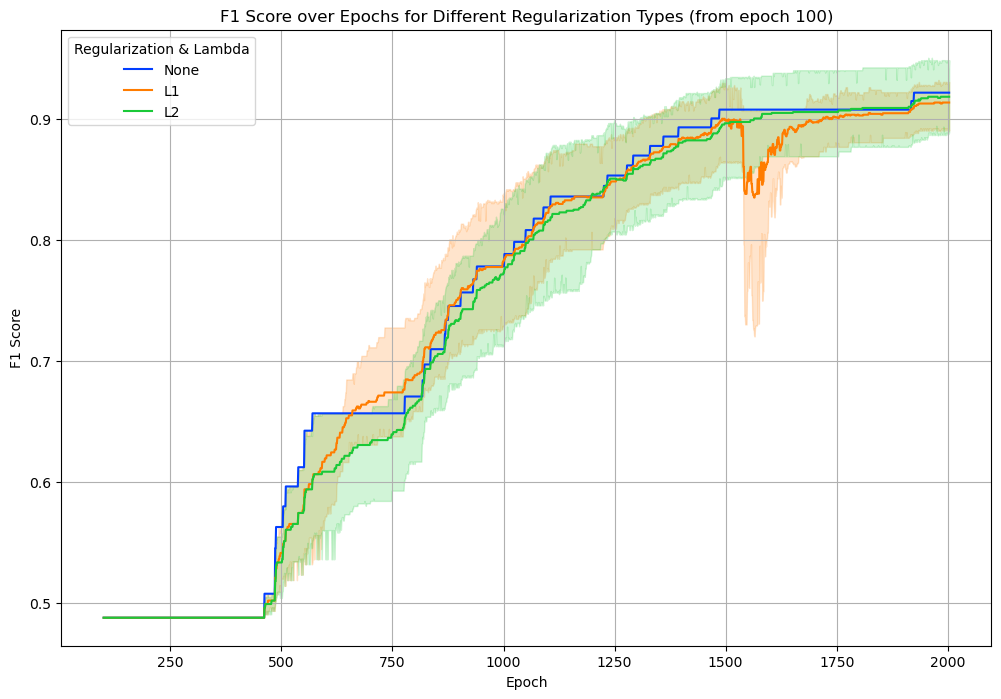

Visualizing F1 score over lambda for different regularization types...


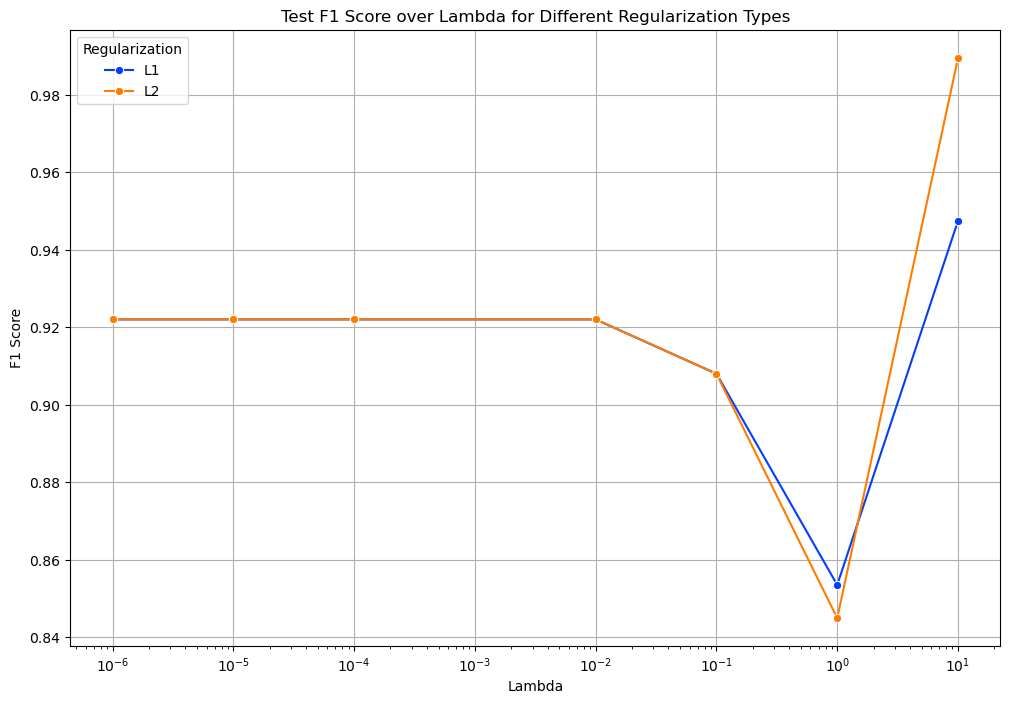

Visualizing best class predictions...


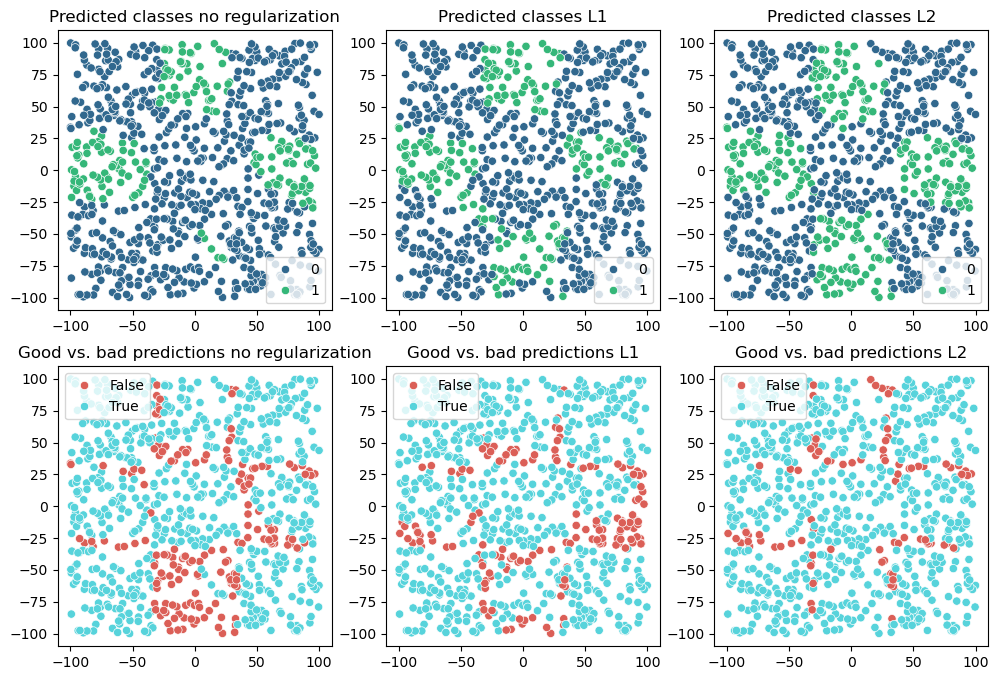

Best F1 scores:
No regularization: 0.7573
L1 regularization (lambda=10): 0.7902
L2 regularization (lambda=10): 0.8809


In [11]:
rings3_res = run_regularization_classification(train_df =xor3_balance_train,
                                  test_df=xor3_balance_test,
                                  layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 2, "activation": Softmax(), "init": "xavier_normal"}],
                                  loss_function=LossCrossEntropy(),
                                  lambdas=[0.000001, 0.00001, 0.0001, 0.01, 0.1, 1, 10],
                                  epochs=5000,
                                  method="momentum",
                                  learning_rate=0.05,
                                  batch_size=None,
                                  clip_value=None,
                                  patience=1000,
                                  delta=10)

#### **Conclusions**
- the test dataset contains significantly more data points for class 1 than train, therefore there is high chance that the results will be far from ideal (however last plot proves different)
- generally, lower lambdas (regularization parameters) provide better results with one outlier to the rule
- regularization methods result in better F1 metric than no regularization
- early stopping works as it should